Import data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [118]:
df = pd.read_csv('data/spam.tsv',sep='\t')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df.isnull().sum()
df.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [120]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Exploratory Data analysis

text preprocessing library 
Install

pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

requirements 
    !pip install textblob

In [121]:
# %pip install spacy
# %python -m spacy download en_core_web_sm
# %pip install beautifulsoup4
# % pip install textblob

In [122]:
# %pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [123]:
import preprocess_kgptalkie as kgptalkie

In [124]:
df['wordcount'] = df['message'].apply(lambda x:kgptalkie.get_wordcounts(x))
df['charcount'] = df['message'].apply(lambda x:kgptalkie.get_charcounts(x))

df['get_avg_wordlength'] = df['message'].apply(lambda x:kgptalkie.get_avg_wordlength(x))
df['get_stopwords_counts'] = df['message'].apply(lambda x:kgptalkie.get_stopwords_counts(x))

df['get_digit_counts'] = df['message'].apply(lambda x:kgptalkie.get_digit_counts(x))
df['get_uppercase_counts'] = df['message'].apply(lambda x:kgptalkie.get_uppercase_counts(x))

In [125]:
df

,label,message,wordcount,charcount,get_avg_wordlength,get_stopwords_counts,get_digit_counts,get_uppercase_counts
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,4,4,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,5,6,2
3,ham,U dun say so early hor... U c already then say...,11,39,3.545455,4,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49,3.769231,6,1,1
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,131,4.366667,9,12,2
5568,ham,Will ü b going to esplanade fr home?,8,29,3.625000,1,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",10,48,4.800000,4,3,0
5570,ham,The guy did some bitching but I acted like i'd...,26,100,3.846154,14,0,1


c:\Users\nachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nachi\AppData\Local\Temp\ipykernel_10924\2319300334.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


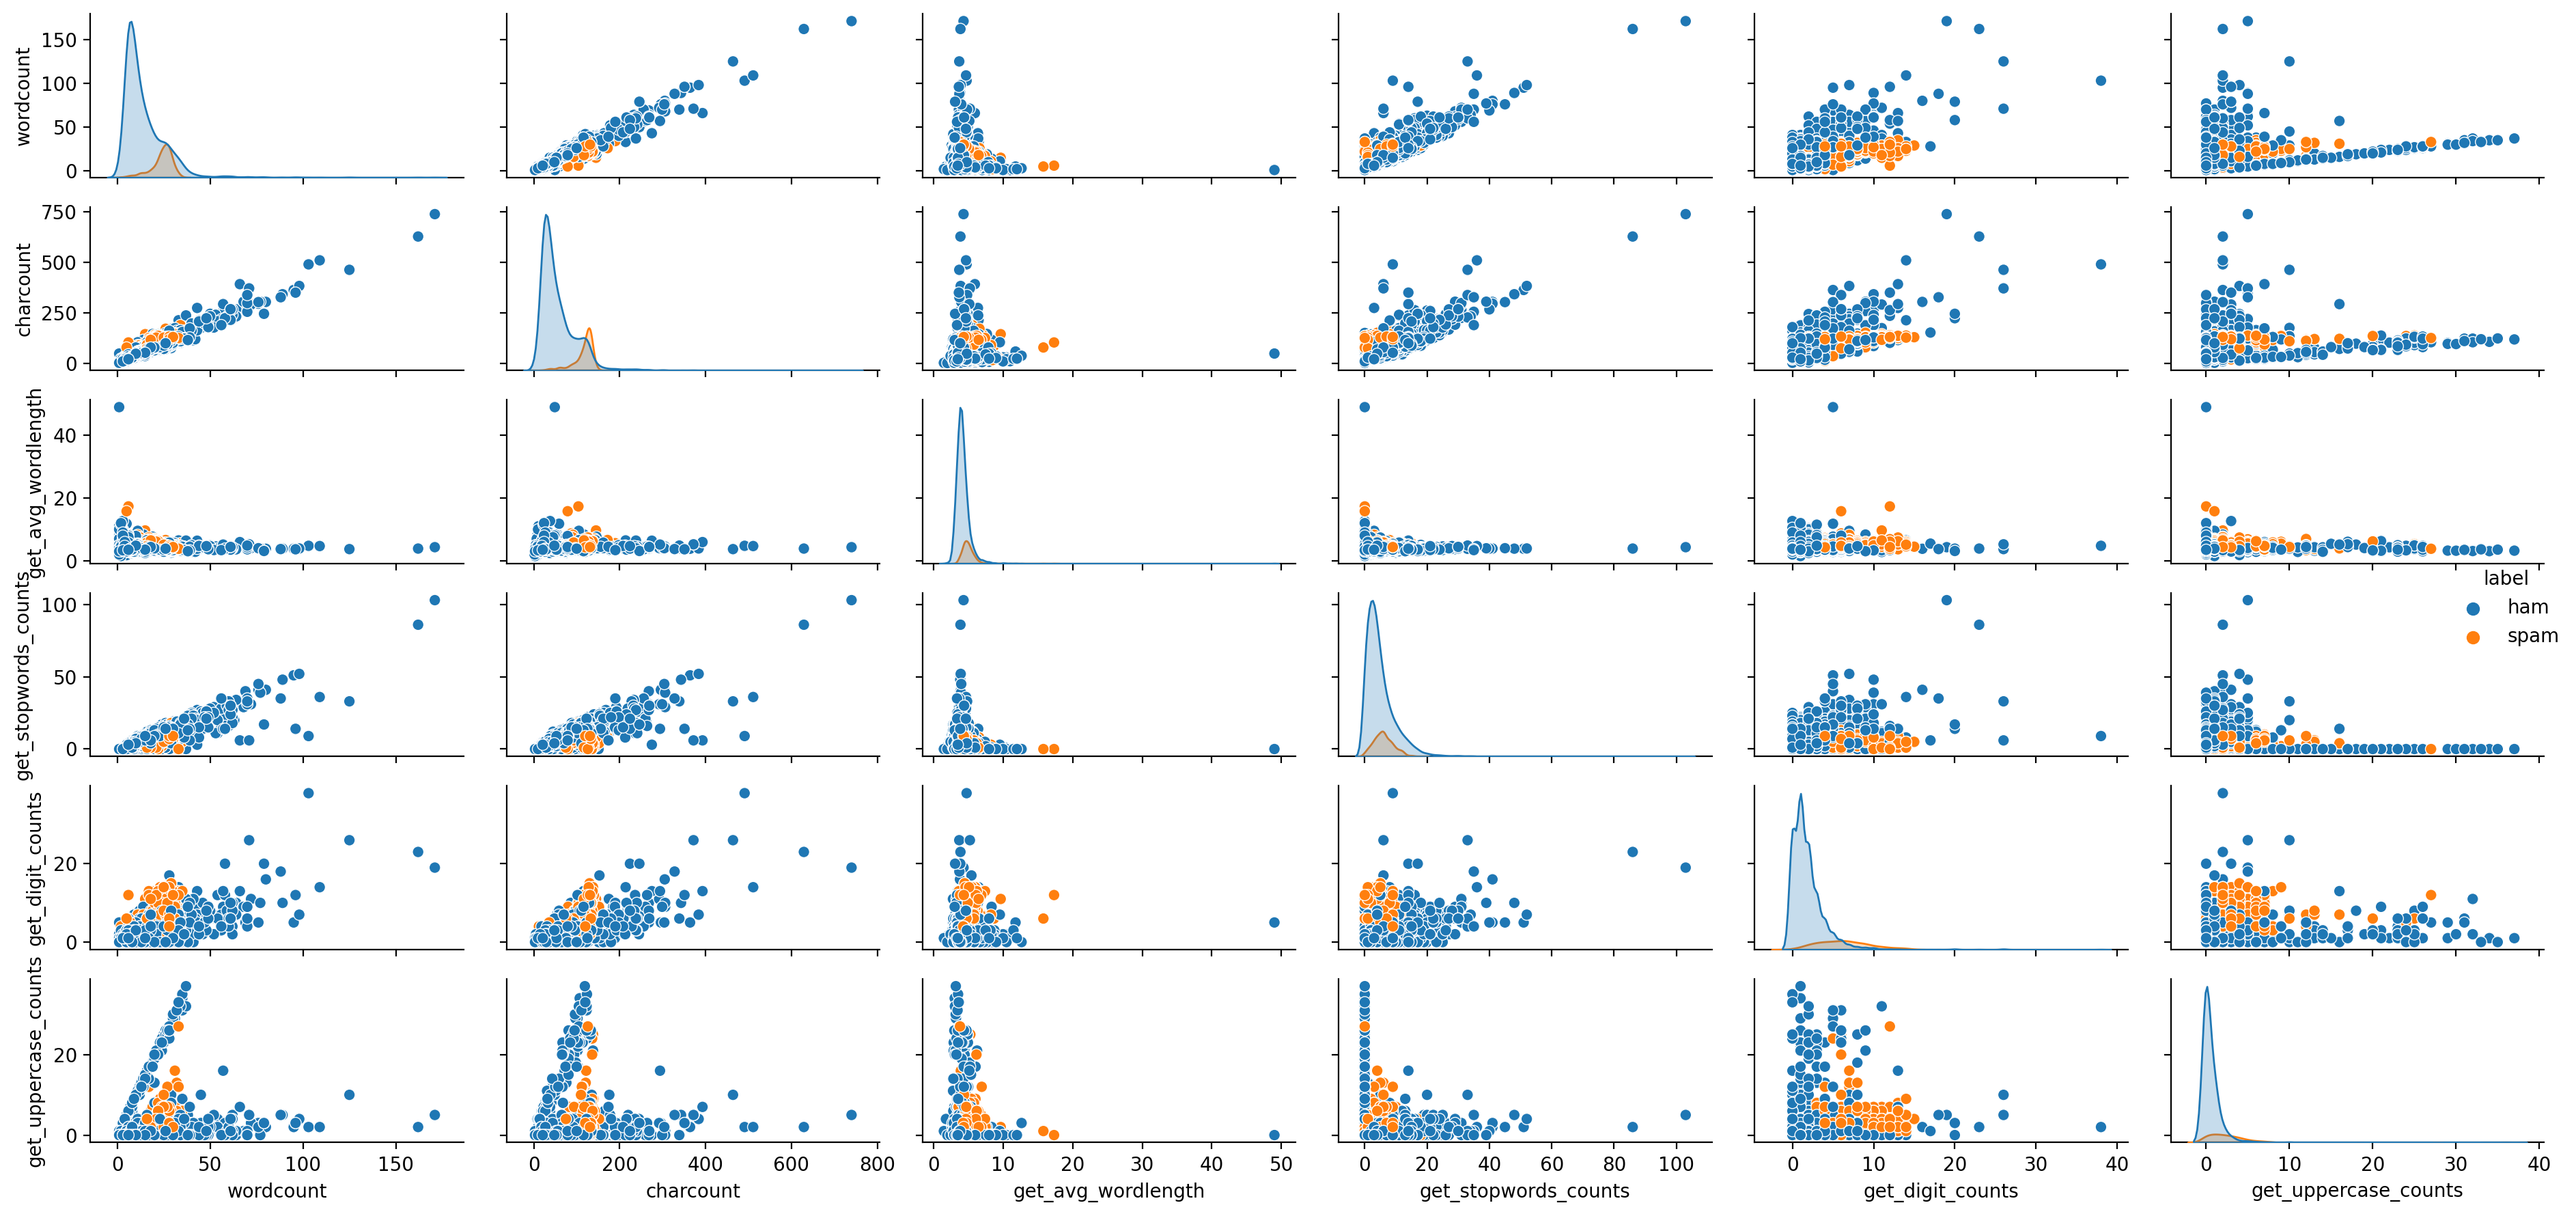

In [126]:
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df,hue='label', height=1.5,aspect=2)
plt.tight_layout()
plt.show()

Train test Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size=0.2,random_state=0,stratify=df['label'])

In [129]:
X_train.shape,y_test.shape

((4457,), (1115,))

TF-IDF

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [132]:
len(tfidf.get_feature_names_out())

7708

In [133]:
(X_train.toarray()).shape

(4457, 7708)

Model Building

In [134]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [135]:
svm = LinearSVC()
svm.fit(X_train,y_train)

c:\Users\nachi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [136]:
y_pred = svm.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.97      0.88      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [138]:
text =['hey whatsup?']
text = tfidf.transform(text)
text.toarray().shape

svm.predict(text)

array(['ham'], dtype=object)

In [140]:
text =['you have won tickets to the USA this summer']
text = tfidf.transform(text)
text.toarray().shape

svm.predict(text)

array(['spam'], dtype=object)